In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import time
import datetime
import dateutil.parser
from matplotlib import rc
import seaborn as sns
rc('text', usetex=True)
rc('font', family='serif')
sns.set_style("ticks")

In [7]:
tweet_database_file_name = 'donald_dump.dat'
tweets = pd.read_table(tweet_database_file_name, delimiter='\t', header=0)

timestamps = [dateutil.parser.parse(x).timestamp() for x in tweets['created_at']]

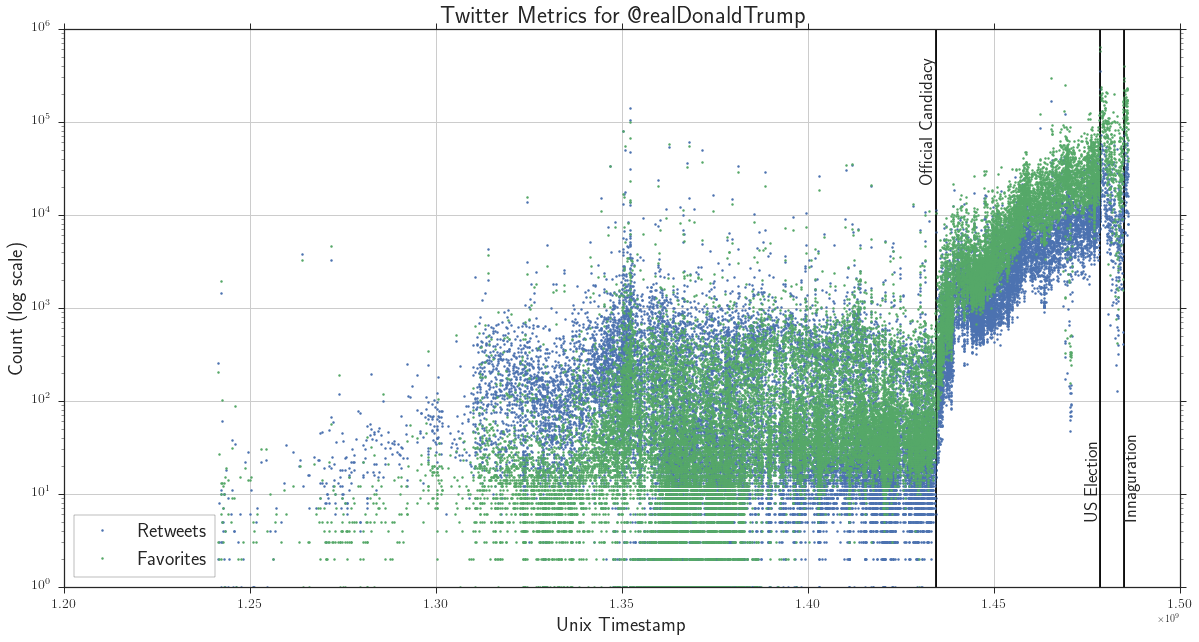

In [35]:
candidacy = 1434448800
election = 1478602800
innaguration = 1484910000

plt.figure(figsize=(20,10))

## Important Dates
plt.gca().annotate('Official Candidacy', xy=(election, 500000), xytext=(candidacy, 100000),
                   fontsize = 18, rotation='vertical', verticalalignment = 'center',
                   horizontalalignment='right')
plt.gca().annotate('US Election', xy=(election, 500000), xytext=(election, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='right')
plt.gca().annotate('Innaguration', xy=(innaguration, 500000), xytext=(innaguration, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='left')
plt.plot([candidacy,candidacy],[1,1000000],'-k')
plt.plot([election,election],[1,1000000],'-k')
plt.plot([innaguration,innaguration],[1,1000000],'-k')


# Data
plt.plot(timestamps,tweets['retweet_count'],'.',alpha=1, label="Retweets",markersize=5,markeredgecolor='none')
plt.plot(timestamps,tweets['favorite_count'],'.',alpha=1, label="Favorites",markersize=5,markeredgecolor='none')


plt.plot([candidacy,candidacy],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([election,election],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([innaguration,innaguration],[1,1000000],'-k',alpha=1,linewidth=0.5)

plt.gca().set_ylim((1,1000000))
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Unix Timestamp',fontsize = 20)
plt.gca().set_ylabel('Count (log scale)', fontsize = 20)
plt.gca().set_title("Twitter Metrics for @realDonaldTrump", fontsize=24)
plt.gca().grid('on')

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
plt.legend(loc=3, fontsize = 20, frameon=True)